# Split Catchment with PyGeoAPI

In [1]:
from pynhd import PyGeoAPI

PyGeoAPI service provides four functionalities:

1. `flow_trace`: Trace flow from a starting point to up/downstream direction.
2. `split_catchment`: Split the local catchment of a point of interest at the point's location.
3. `elevation_profile`: Extract elevation profile along a flow path between two points.
4. `cross_section`: Extract cross-section at a point of interest along a flow line.

Let's take a look at them in an example.

We can pass the coordinates of a point of interest in any CRS. The `flow_trace` function returns the closest up/downstream flowline to the point of interest.

In [2]:
pygeoapi = PyGeoAPI()

trace = pygeoapi.flow_trace((1774209.63, 856381.68), crs="ESRI:102003", direction="none")

In the `split_catchment` function we can set `upstream` to `True` to get the entire upstream catchments not just the splitted local catchments.

In [3]:
split = pygeoapi.split_catchment((-73.82705, 43.29139), crs="epsg:4326", upstream=False)

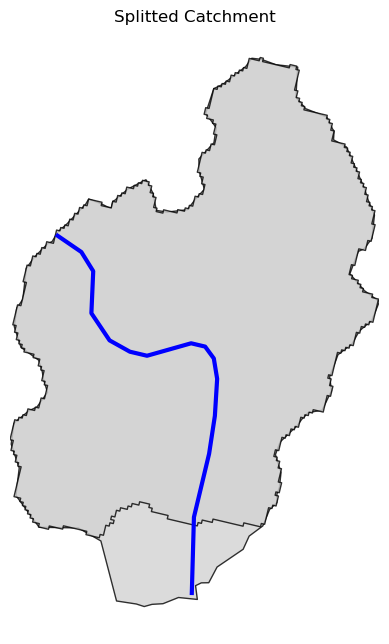

In [4]:
ax = split.plot(figsize=(8, 8), facecolor="lightgrey", edgecolor="black", alpha=0.8)
trace.plot(ax=ax, color="b", linewidth=3.0)
ax.axis("off")
ax.set_title("Splitted Catchment")
ax.margins(x=0)
ax.figure.set_dpi(100)
ax.figure.savefig("_static/split_catchment.png", bbox_inches="tight", facecolor="w", dpi=100)

The `elevation_profile` function return the elevation profile along a flow path between two points at a given number of points and a specified resolution for DEM.

In [5]:
profile = pygeoapi.elevation_profile(
    [(-103.801086, 40.26772), (-103.80097, 40.270568)], numpts=101, dem_res=1, crs="epsg:4326"
)

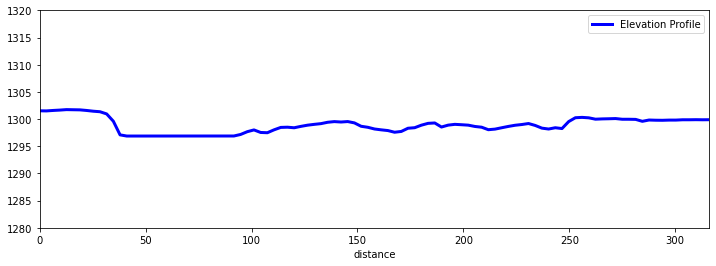

In [6]:
ax = profile[["distance", "elevation"]].plot(
    x="distance", y="elevation", color="b", linewidth=3.0, figsize=(12, 4)
)
ax.set_ylim(1280, 1320)
ax.legend(["Elevation Profile"])
ax.margins(x=0)

The `cross_section` function extract the cross-section within a buffer distance from a point of interest along a flow line and at a given number of points.

In [7]:
section = pygeoapi.cross_section((-103.80119, 40.2684), width=1000.0, numpts=101, crs="epsg:4326")

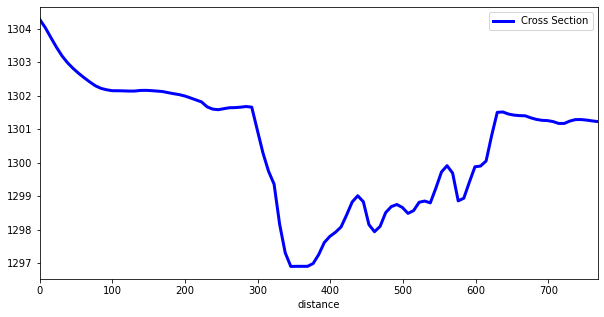

In [8]:
ax = section[["distance", "elevation"]].plot(
    x="distance", y="elevation", color="b", linewidth=3.0, figsize=(10, 5)
)
ax.legend(["Cross Section"])
ax.margins(x=0)